In [112]:
#For data
import numpy as np
import pandas as pd
import datetime

In [113]:
#For Charts
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [114]:
#Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [115]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [116]:
#1. Load and clean the dataset (remove NA, duplicates).
data=pd.read_csv('/content/marketing_campaign.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [117]:
# 2. Basic preprocessing
data = data.copy()
data['Age'] = 2025 - data['Year_Birth']
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
data['Total_Spenting'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [118]:
print(data.shape)

(2240, 32)


In [119]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [120]:
#Remove NA
data = data.dropna()
print("Shape after removing NA:", data.shape)

Shape after removing NA: (2216, 32)


In [121]:
print("count to duplicate value:",data.duplicated().sum())

count to duplicate value: 0


In [122]:
#Remove Duplicate
data = data.drop_duplicates()
print("Shape after removing duplicates:", data.shape)

Shape after removing duplicates: (2216, 32)


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [124]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spenting
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,56.179603,0.947202,607.075361
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,0.749062,602.900476
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,29.000000,0.000000,5.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,48.000000,0.000000,69.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,1.000000,396.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,66.000000,1.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,132.000000,3.000000,2525.000000


In [125]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spenting'],
      dtype='object')

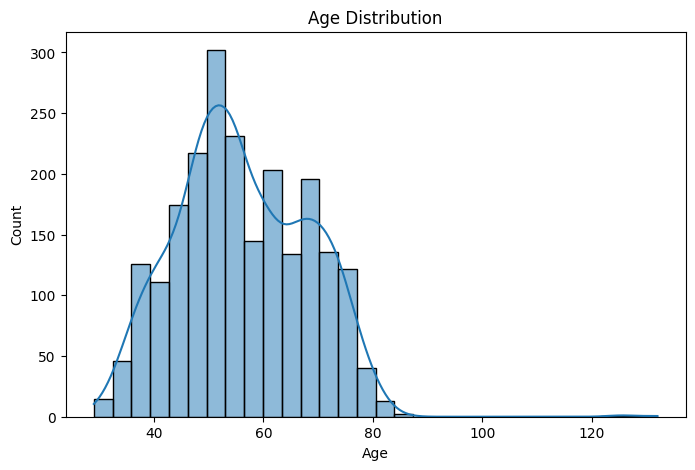

In [126]:
#2. Visualize spending patterns and demographics.
#A.Visualize Demographics
#Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


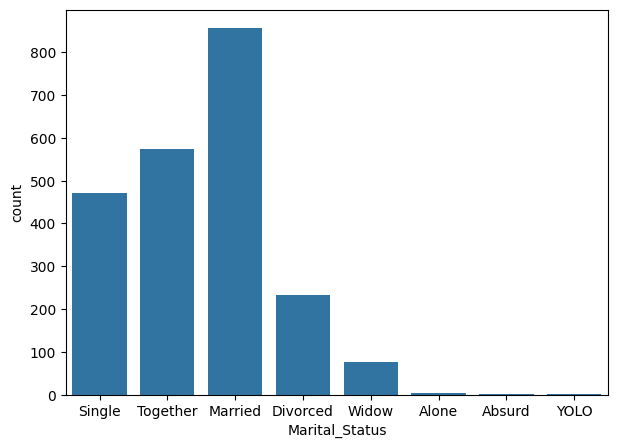

In [127]:
#Marital Status
plt.figure(figsize=(7,5))
sns.countplot(x='Marital_Status', data=data)
plt.show()


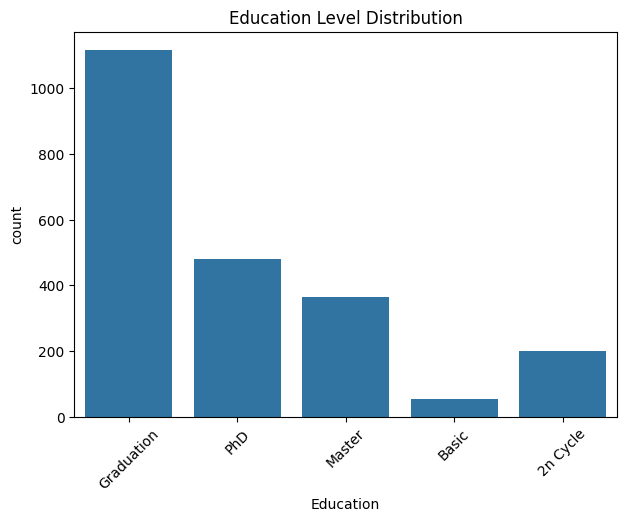

In [128]:
#Education Levels
plt.figure(figsize=(7,5))
sns.countplot(x='Education', data=data)
plt.title("Education Level Distribution")
plt.xticks(rotation=45)
plt.show()


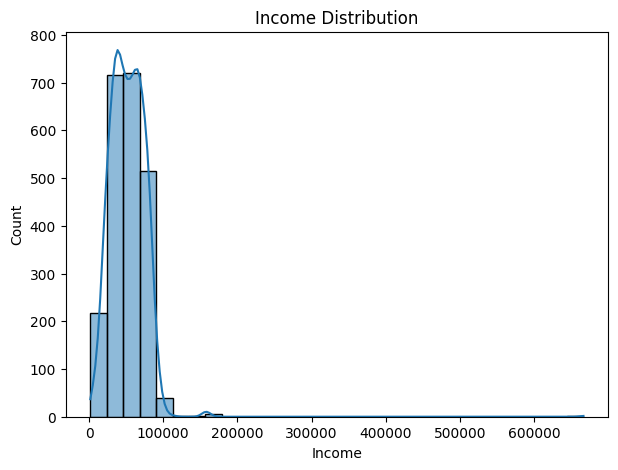

In [129]:
#Income Distribution
plt.figure(figsize=(7,5))
sns.histplot(data['Income'], kde=True, bins=30)
plt.title("Income Distribution")
plt.show()

In [130]:
#B. Visualize Spending Patterns
total_spending = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
print(total_spending)

['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


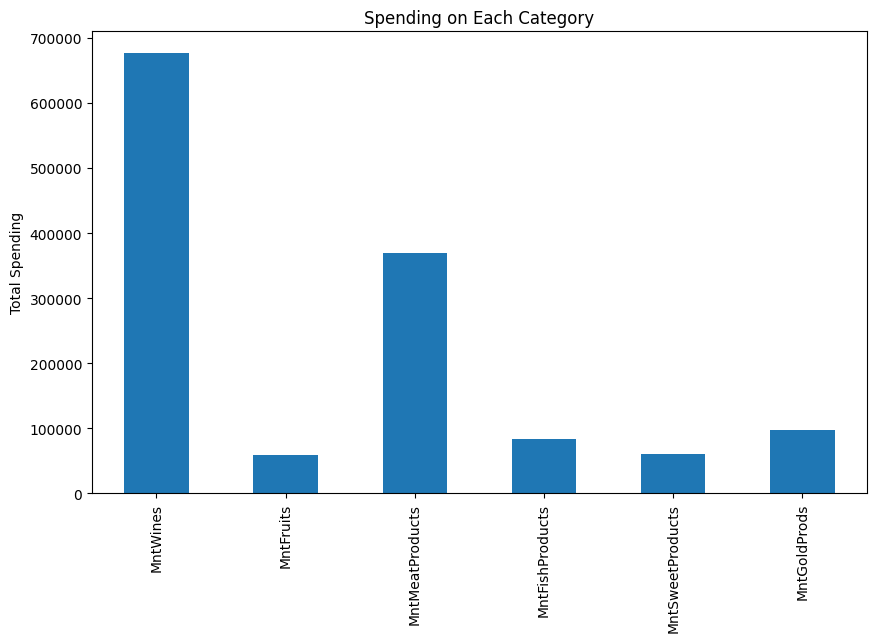

In [131]:
#1.Spending on Each Category
plt.figure(figsize=(10,6))
data[total_spending].sum().plot(kind='bar')
plt.title("Spending on Each Category")
plt.ylabel("Total Spending")
plt.show()

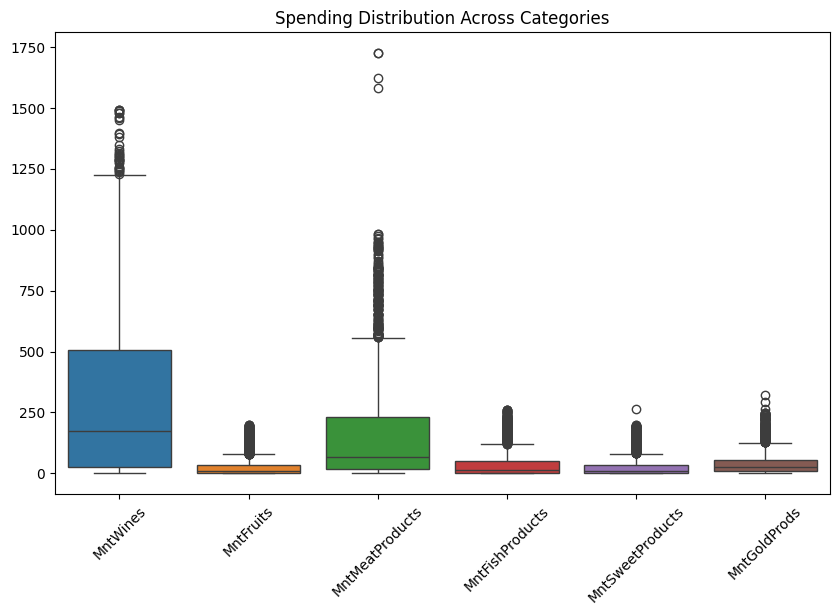

In [132]:
#2. Boxplot — Spending Distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=data[total_spending])
plt.title("Spending Distribution Across Categories")
plt.xticks(rotation=45)
plt.show()


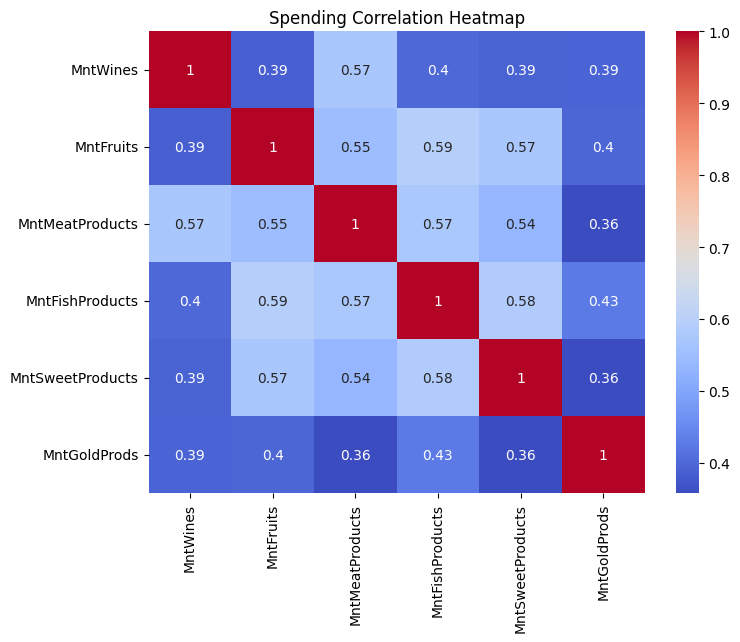

In [133]:
#3. Correlation Heatmap of Spending
plt.figure(figsize=(8,6))
sns.heatmap(data[total_spending].corr(), annot=True, cmap='coolwarm')
plt.title("Spending Correlation Heatmap")
plt.show()

In [159]:
#3. Normalize numerical features (spending, income).
drop_like = ["id", "customer", "dt_customer", "date", "email", "address"]
features = [c for c in data.columns if (c not in drop_like) and (data[c].dtype in [np.int64, np.float64])]

# remove Year_Birth if Age present to avoid duplication
if "Age" in data.columns and "Year_Birth" in features:
    features.remove("Year_Birth")

X = data[features].copy()
print("Features used for clustering:", features)


Features used for clustering: ['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_Children', 'Total_Spenting', 'PC1', 'PC2', 'Loyalty', 'MntTotal']


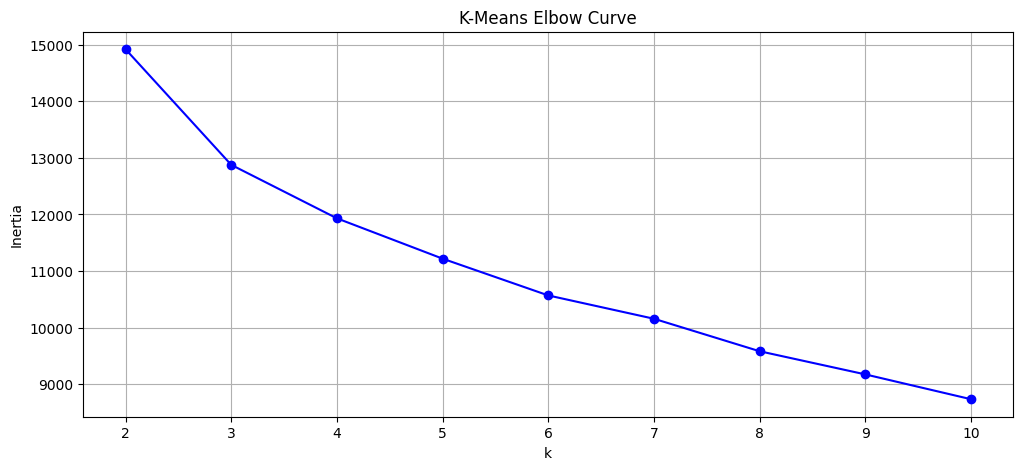

In [135]:
#4. Choose optimal number of clusters using Elbow method.

inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.plot(K, inertia, 'bo-')
plt.title('K-Means Elbow Curve')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [136]:
#5. Apply K-Means clustering.

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

#K-Mean Cluster Distribution
plt.figure(figsize=(5,4))
data['KMeans_Cluster'].value_counts().plot(kind='bar')
plt.title("K-Means Cluster Distribution")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.show()

KeyError: 'KMeans_Cluster'

<Figure size 500x400 with 0 Axes>

In [137]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'].value_counts()

,count
KMeans_Cluster,
0,933
3,616
2,340
1,327


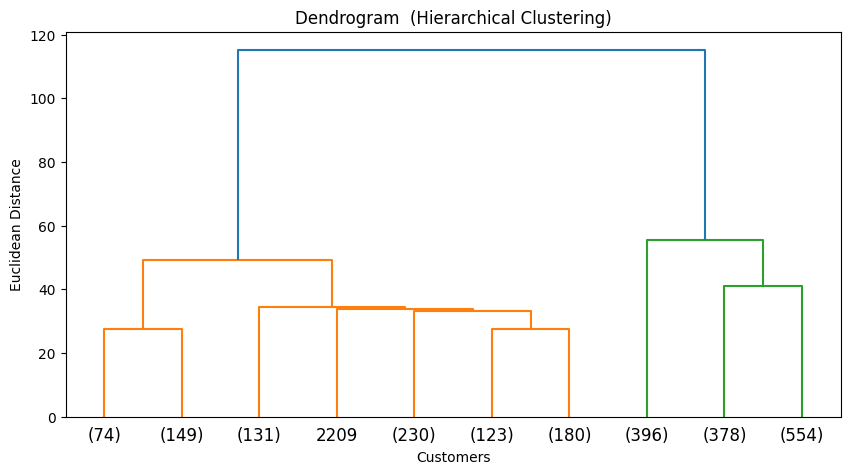

In [138]:
#6. Apply Hierarchical clustering and compare.
# Linkage and dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Dendrogram  (Hierarchical Clustering)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [139]:
# Assign clusters
data['Hierarchical_Cluster'] = fcluster(linked, t=4, criterion='maxclust')
data['Hierarchical_Cluster'].value_counts()

,count
Hierarchical_Cluster,
4,932
2,665
3,396
1,223


In [140]:
# Compare clusters
print(data[['KMeans_Cluster', 'Hierarchical_Cluster']].value_counts())

KMeans_Cluster  Hierarchical_Cluster
0               4                       897
3               3                       394
2               2                       298
3               2                       187
1               1                       181
                2                       146
2               1                        42
3               4                        35
0               2                        34
                3                         2
Name: count, dtype: int64


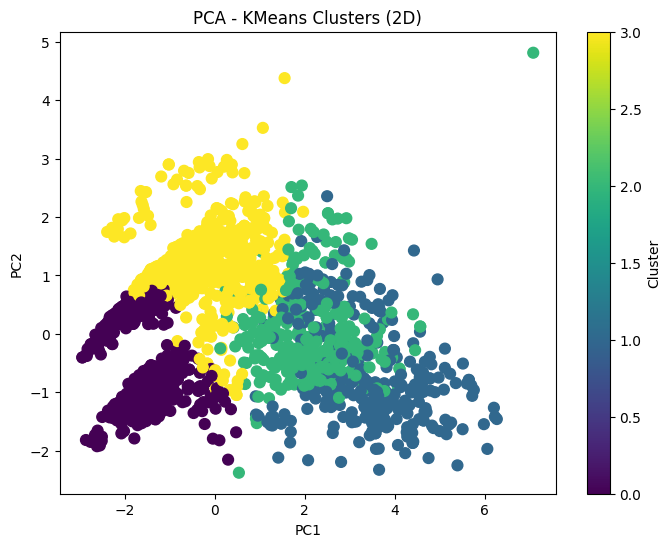

In [141]:
#7. Visualize clusters using PCA or t-SNE.

#Visualize clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
pca_data.shape

# Add PCA components
data['PC1'] = pca_data[:, 0]
data['PC2'] = pca_data[:, 1]

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['PC1'], data['PC2'],
            c=data['KMeans_Cluster'], cmap='viridis', s=60)
plt.title("PCA - KMeans Clusters (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

In [148]:
#8. Profile each cluster (age, income, loyalty).

# ---- CLUSTER PROFILING ----
# Add cluster labels to dataframe
# ---- CLUSTER PROFILING ----

# Add cluster labels
data['KMeans_Cluster'] = kmeans.labels_

# Compute Age
data['Age'] = 2024 - data['Year_Birth']

# Compute Loyalty (years since customer joined)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce')
data['Loyalty'] = 2024 - data['Dt_Customer'].dt.year

# Create Cluster Profile
cluster_profile = data.groupby('KMeans_Cluster').agg({'Age': 'mean','Income': 'mean','Loyalty': 'mean',
                                                      'MntWines': 'mean','MntMeatProducts': 'mean','MntFruits': 'mean',
                                                      'MntFishProducts': 'mean','MntGoldProds': 'mean',
                                                      'NumWebPurchases': 'mean','NumStorePurchases': 'mean'}).round(2)

print(cluster_profile)


                  Age    Income  Loyalty  MntWines  MntMeatProducts  \
KMeans_Cluster                                                        
0               51.29  33782.78    10.96     50.01            28.33   
1               54.71  72820.10    11.04    489.07           400.19   
2               57.16  77567.06    11.05    733.53           452.43   
3               60.22  55317.53    10.98    357.30            95.68   

                MntFruits  MntFishProducts  MntGoldProds  NumWebPurchases  \
KMeans_Cluster                                                              
0                    5.74             8.22         16.55             2.36   
1                   94.27           130.57         93.40             5.62   
2                   39.57            61.73         64.54             5.37   
3                   14.24            19.57         47.89             5.18   

                NumStorePurchases  
KMeans_Cluster                     
0                            3.34  
1 

In [155]:
#9. Label original dataset with cluster IDs.
final_clustered_data = data.copy()
final_clustered_data.head()

final_clustered_data.to_csv("Customer_Segmentation_with_Clusters.csv", index=False)

In [156]:
#10. Recommend marketing strategy per cluster.

data["MntTotal"] = (data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] +
data["MntSweetProducts"] + data["MntGoldProds"])

cluster_profile = data.groupby('Cluster').agg({'Age': 'mean','Income': 'mean','MntTotal': 'mean',})
data['Cluster'] = kmeans.labels_

cluster_summary = data.groupby('Cluster').agg({'Income': 'mean','MntWines': 'mean','MntMeatProducts': 'mean','MntGoldProds': 'mean','NumDealsPurchases': 'mean',
'Recency': 'mean','MntTotal': 'mean'}).round(2)

print("===== CLUSTER SUMMARY =====")
display(cluster_summary)

def describe_cluster(row):
    desc = []

    # Income level
    if row['Income'] > data['Income'].mean():
        desc.append("High Income")
    else:
        desc.append("Low/Medium Income")

    # Spending level
    if row['MntTotal'] > data['MntTotal'].mean():
        desc.append("High Spenders")
    else:
        desc.append("Low Spenders")

    # Recency
    if row['Recency'] < data['Recency'].mean():
        desc.append("Recent active buyers")
    else:
        desc.append("Not recent buyers")

    return ", ".join(desc)

cluster_summary['Description'] = cluster_summary.apply(describe_cluster, axis=1)

print("===== CLUSTER DESCRIPTIONS =====")
display(cluster_summary[['Description']])

def marketing_strategy(desc):
    if "High Income" in desc and "High Spenders" in desc:
        return "Target premium offers, exclusive launches, loyalty rewards."

    if "High Income" in desc and "Low Spenders" in desc:
        return "Provide first-purchase coupons, retarget with personalized ads."

    if "Low/Medium Income" in desc and "High Spenders" in desc:
        return "Promote value combos, cross-selling, festival discounts."

    if "Low/Medium Income" in desc and "Low Spenders" in desc:
        return "Send price-drop alerts, affordable packs, cashback offers."

    return "General engagement campaigns."

cluster_summary['Marketing Strategy'] = cluster_summary['Description'].apply(marketing_strategy)

print("===== MARKETING ACTION POINTS =====")
display(cluster_summary[['Description', 'Marketing Strategy']])



===== CLUSTER SUMMARY =====


,Income,MntWines,MntMeatProducts,MntGoldProds,NumDealsPurchases,Recency,MntTotal
Cluster,,,,,,,
0,33782.78,50.01,28.33,16.55,2.35,49.21,114.41
1,72820.10,489.07,400.19,93.40,1.75,48.30,1303.36
2,77567.06,733.53,452.43,64.54,1.55,51.25,1394.41
3,55317.53,357.30,95.68,47.89,3.01,47.85,549.08


===== CLUSTER DESCRIPTIONS =====


,Description
Cluster,
0,"Low/Medium Income, Low Spenders, Not recent bu..."
1,"High Income, High Spenders, Recent active buyers"
2,"High Income, High Spenders, Not recent buyers"
3,"High Income, Low Spenders, Recent active buyers"


===== MARKETING ACTION POINTS =====


,Description,Marketing Strategy
Cluster,,
0,"Low/Medium Income, Low Spenders, Not recent bu...","Send price-drop alerts, affordable packs, cash..."
1,"High Income, High Spenders, Recent active buyers","Target premium offers, exclusive launches, loy..."
2,"High Income, High Spenders, Not recent buyers","Target premium offers, exclusive launches, loy..."
3,"High Income, Low Spenders, Recent active buyers","Provide first-purchase coupons, retarget with ..."
